In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile
from qiskit.transpiler.passes import Depth
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator

import sys
import os

sys.path.append(os.path.abspath("..\\..\\.."))
from objects.FiveQbPerfectCode import FiveQbPerfectCodeCircuit
from functions import *


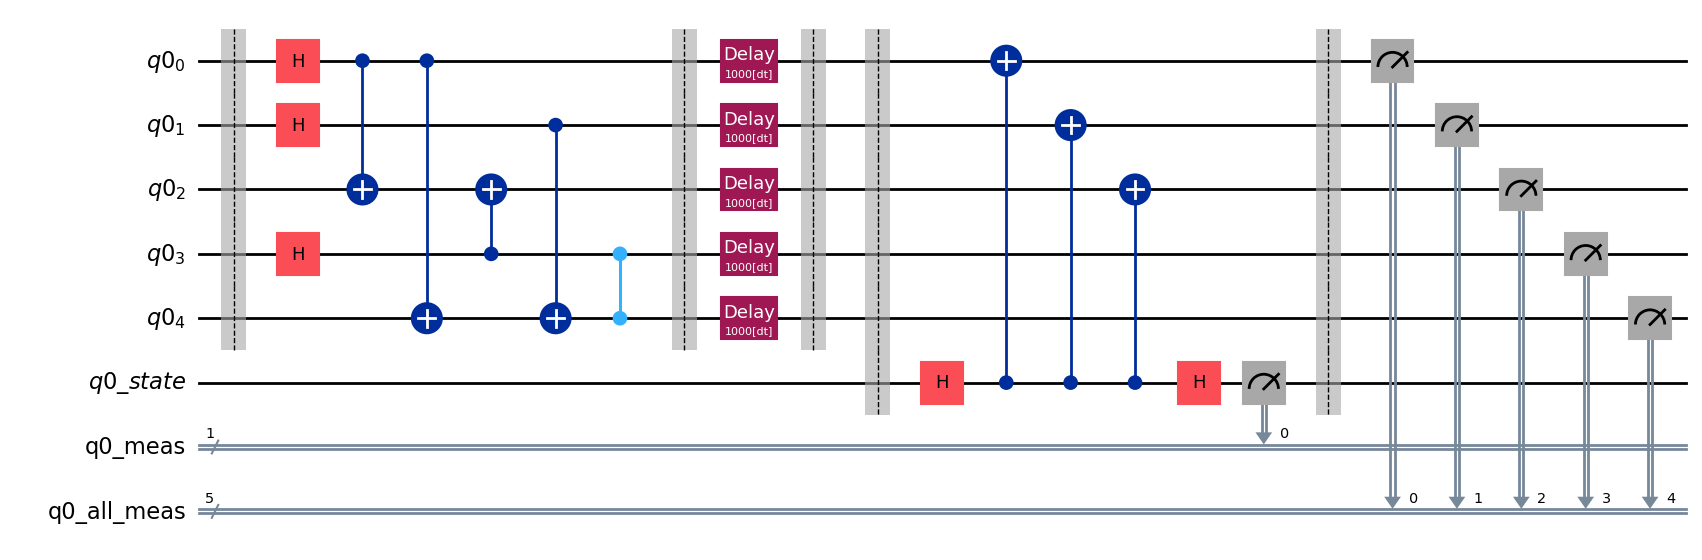

In [26]:


def load_circuit(delay):
    qc = FiveQbPerfectCodeCircuit(1)

    qc.encode(type='0')
    
    qc.delay(delay)
    
    qc.logical_measure(basis='Z')

    qc.measure_all()

    return qc

qc = load_circuit(1000)
qc.draw('mpl')



In [3]:
ibm_token = ""
service = QiskitRuntimeService(channel="ibm_quantum", token=ibm_token)
backend = service.backend("ibm_kyiv")

In [4]:

phy_qc = qc.physical_circuit
isa_circuit = transpile(phy_qc, backend, scheduling_method="asap", optimization_level=3)
print(f"Circuit Depth: {qc.physical_circuit.depth()}")
print(f"Transpiled Circuit Depth: {isa_circuit.depth()}")
# isa_circuit.draw(output='mpl')



Circuit Depth: 13
Transpiled Circuit Depth: 74


In [5]:
dt = backend.configuration().dt * 10**9
print(f'dt = {round(dt, 3)} ns')

dt = 0.222 ns


In [9]:
# t_array = [t*4_000 for t in range(0, 6)] # brisbane
t_array = [t*9_000 for t in range(0, 6)] # kyiv
print([round(t*dt * 10**(-3), 3) for t in t_array])

[0.0, 2.0, 4.0, 6.0, 8.0, 10.0]


In [78]:
circuits = []

for t in t_array:

    qc = load_circuit(t)

    isa_circuit = get_transpile(qc.physical_circuit, backend, iterations=20, scheduling_method="asap", optimization_level=3,
                                initial_layout=[41, 42, 53, 40, 60, 43]
                                )
    circuits.append(isa_circuit)

    print(f"Circuit Depth: {circuits[-1].depth()}")
    print(f"Delay Duration: {round(t*dt * 10**(-3), 3)} us")
    print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us")
    print(get_layout(circuits[-1], qb_len=6))
    print('\n')
    # c.draw(output='mpl')

Circuit Depth: 58
Delay Duration: 0.0 us
Total Duration: 12.452 us
[41, 42, 53, 40, 60]




C:\Users\marzu\AppData\Local\Temp\ipykernel_33428\165795377.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us")


Circuit Depth: 60
Delay Duration: 2.0 us
Total Duration: 14.453 us
[41, 42, 53, 40, 60]




C:\Users\marzu\AppData\Local\Temp\ipykernel_33428\165795377.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us")


Circuit Depth: 59
Delay Duration: 4.0 us
Total Duration: 16.452 us
[41, 42, 53, 40, 60]




C:\Users\marzu\AppData\Local\Temp\ipykernel_33428\165795377.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us")


Circuit Depth: 60
Delay Duration: 6.0 us
Total Duration: 18.453 us
[41, 42, 53, 40, 60]




C:\Users\marzu\AppData\Local\Temp\ipykernel_33428\165795377.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us")


Circuit Depth: 59
Delay Duration: 8.0 us
Total Duration: 20.452 us
[41, 42, 53, 40, 60]




C:\Users\marzu\AppData\Local\Temp\ipykernel_33428\165795377.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us")


Circuit Depth: 60
Delay Duration: 10.0 us
Total Duration: 22.453 us
[41, 42, 53, 40, 60]




C:\Users\marzu\AppData\Local\Temp\ipykernel_33428\165795377.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us")


In [10]:
simulation_result = sampler_simulation(qc.physical_circuit, 3200)

for lq in qc.qubits:

    # resultados de medir estado logico
    state = lq.qb_measure
    print(f"  {state.name}: {simulation_result.data[state.name].get_counts()}")

    state = lq.all_measures
    print(f"  {state.name}: {simulation_result.data[state.name].get_counts()}")
    # return simulation_result.data[state.name].get_counts()        


  q0_meas: {'0': 3200}
  q0_all_meas: {'01011': 376, '01100': 388, '00111': 413, '10101': 409, '11001': 402, '00000': 403, '11110': 402, '10010': 407}


In [11]:
sampler = SamplerV2(backend=backend)
shots = 3200
# job = sampler.run(circuits, shots=shots)
job = service.job('cykxg3001rbg008geqfg') # kyiv, shots = 3200, print([round(t*dt * 10**(-3), 3) for t in t_array])

pub_result = job.result()


In [12]:
states = [bin(i)[2:].zfill(5) for i in range(2**5)]

results = []
logical_meas_results = []

for i in range(len(t_array)):
    result = pub_result[i]

    meas = result['__value__']['data']['q0_all_meas'].get_counts()
    
    res = {}
    for k in states:
        k_inv = k[::-1]
        res[k] = meas[k_inv] if k_inv in meas else 0
        res[k] = res[k] / shots * 100
    results.append(res)

    logical_meas_results.append(result['__value__']['data']['q0_meas'].get_counts())



In [14]:
delays = [round(t*dt/1000) for t in t_array]

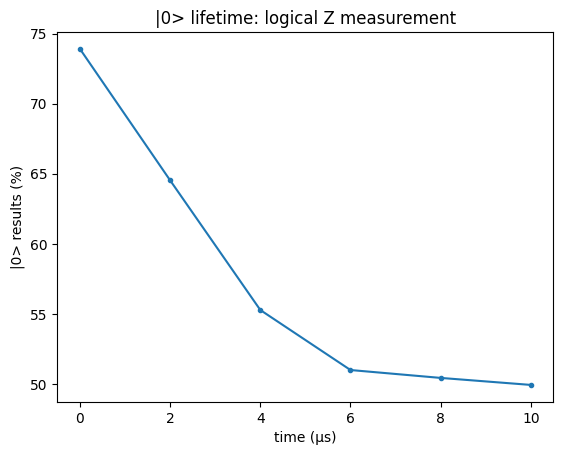

In [15]:
import matplotlib.pyplot as plt

x = delays

y = [logical_meas_results[i]['0'] / shots*100 for i in range(len(x))]

plt.plot(x, y, '.-')

plt.xlabel('time (μs)')
plt.ylabel('|0> results (%)')
plt.title('|0> lifetime: logical Z measurement')

plt.show()


In [16]:
# print(f" delay\t| 111\t| 000\t| other states")
print(f" delay (μs)", *[f"{s}" for s in states], sep='\t ')
print("----------------------------------------------------------------------------------")
for i in range(len(t_array)):

    # print(f" > {meas}, error rate: {shots - meas['1']}%")
    print(f" {delays[i]}\t", *[round(results[i][s]*shots/100) for s in states], sep='\t ')

 delay (μs)	 00000	 00001	 00010	 00011	 00100	 00101	 00110	 00111	 01000	 01001	 01010	 01011	 01100	 01101	 01110	 01111	 10000	 10001	 10010	 10011	 10100	 10101	 10110	 10111	 11000	 11001	 11010	 11011	 11100	 11101	 11110	 11111
----------------------------------------------------------------------------------
 0		 159	 98	 139	 99	 138	 90	 248	 89	 32	 150	 29	 125	 28	 111	 21	 105	 33	 123	 31	 130	 41	 154	 34	 134	 126	 68	 190	 64	 142	 84	 128	 57
 2		 195	 78	 119	 79	 139	 90	 233	 65	 28	 129	 20	 159	 34	 133	 31	 113	 47	 150	 50	 118	 38	 121	 48	 123	 118	 64	 208	 59	 180	 61	 117	 53
 4		 238	 69	 100	 67	 138	 72	 264	 66	 35	 116	 23	 123	 32	 145	 41	 129	 32	 134	 54	 128	 60	 115	 38	 111	 112	 65	 217	 67	 187	 64	 98	 60
 6		 210	 75	 112	 47	 113	 60	 265	 88	 36	 141	 45	 79	 34	 127	 52	 162	 50	 111	 73	 157	 60	 143	 32	 79	 102	 59	 220	 97	 168	 66	 101	 36
 8		 229	 79	 108	 45	 117	 37	 231	 97	 43	 158	 35	 97	 34	 81	 52	 167	 47	 87	 73	 157	 

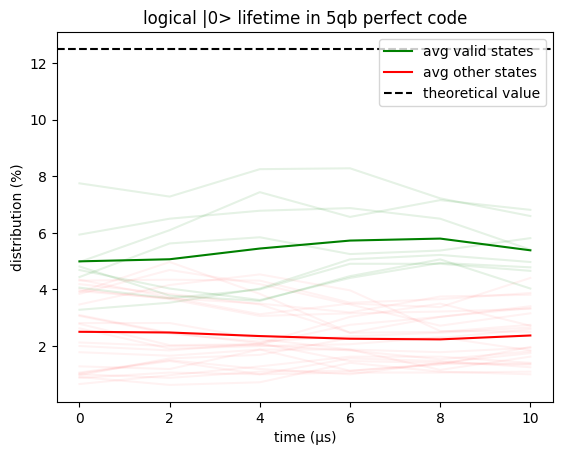

In [17]:

import math

import numpy as np

valid_states = [
    '00000',
    '11100',
    '11010',
    '00110',
    '01001',
    '10101',
    '10011',
    '01111',

]

# possible_valid_states = []
# x = [math.log(d) for d in delays]
x = delays
y = {}
for s in states:
    y[s] = [r[s] for r in results]
    
    # if y[s][0] > 5:
        # possible_valid_states.append(s)
    if s in valid_states:
        # if s == '00000':
        #     plt.plot(x, y[s], alpha=0.2, color='black')
        #     continue
        plt.plot(x, y[s], alpha=0.1, color='green')
    else:
        plt.plot(x, y[s], alpha=0.05, color='red')


plt.plot(x, [np.mean([r[s] for s in valid_states]) for r in results], label='avg valid states', color='green')
# plt.plot(x, [sum([r[s] for s in possible_valid_states if s != '00000'])/7 for r in results], label='avg valid states', color='black')
plt.plot(x, [np.mean([r[s] for s in states if s not in valid_states]) for r in results], label='avg other states', color='red')

plt.axhline(y=100/8, color='k', linestyle='--', label='theoretical value')
    
# Add labels and title
plt.xlabel('time (μs)')
plt.ylabel('distribution (%)')
plt.title('logical |0> lifetime in 5qb perfect code')
plt.legend()

# Display the plot
plt.show()

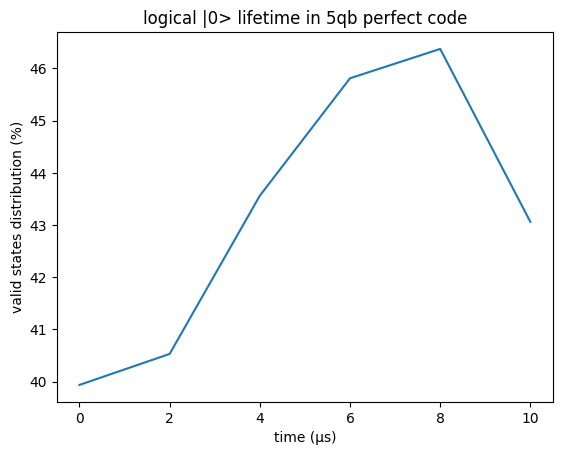

In [18]:
plt.plot(x, [sum([r[s] for s in valid_states]) for r in results], label='valid states')

# Add labels and title
plt.xlabel('time (μs)')
plt.ylabel('valid states distribution (%)')
plt.title('logical |0> lifetime in 5qb perfect code')
# plt.legend()

# Display the plot
plt.show()

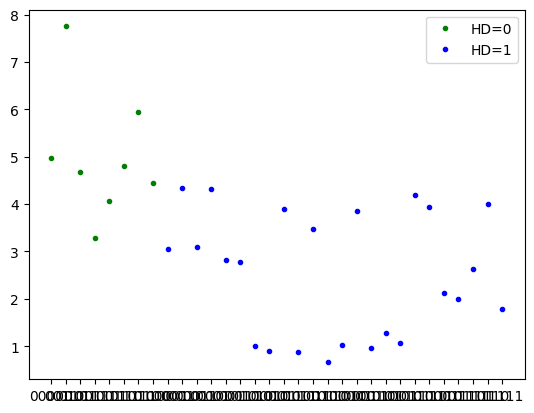

In [22]:
plot_results_hamming_distance(results[0], 5, valid_states)

TVD (final state)

In [19]:
alpha = {}

for s in states:
    alpha[s] = 1/len(valid_states) if s in valid_states else 0


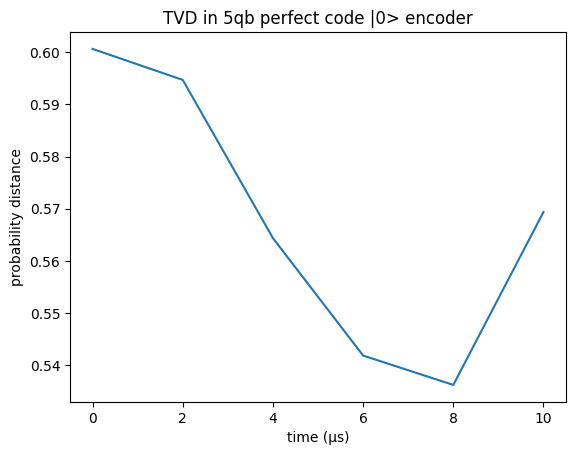

In [20]:
tvd = [sum([abs(r[s]/100 - alpha[s]) for s in states])/2 for r in results]

plt.plot(x, tvd)

# Add labels and title
plt.xlabel('time (μs)')
plt.ylabel('probability distance')
plt.title('TVD in 5qb perfect code |0> encoder')

# Display the plot
plt.show()

In [21]:
print(f"best TVD: {round(min(tvd)*100,2)}%")

best TVD: 53.62%


TVD (logical measurement)

In [23]:
for i in range(len(t_array)):
    print(logical_meas_results[i])
    print(f"TVD: {logical_meas_results[i]['1'] / shots*100}%")

{'0': 2365, '1': 835}
TVD: 26.09375%
{'1': 1135, '0': 2065}
TVD: 35.46875%
{'0': 1769, '1': 1431}
TVD: 44.71875%
{'1': 1568, '0': 1632}
TVD: 49.0%
{'1': 1586, '0': 1614}
TVD: 49.5625%
{'1': 1602, '0': 1598}
TVD: 50.0625%
